# <center> Individual Hometask </center>
## <center> Kirill Zakharov </center>
<center>  13.03.2021 </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline
plt.style.use('ggplot')

In [15]:
data = pd.read_csv('6_TGE_USA.csv', index_col='Month', parse_dates=True)
data.index = pd.DatetimeIndex(data.index, freq='MS')
data.columns = ['TGE_USA']
data.head(4)

,TGE_USA
Month,
1985-01-01,227.86
1985-02-01,198.24
1985-03-01,194.97
1985-04-01,184.88


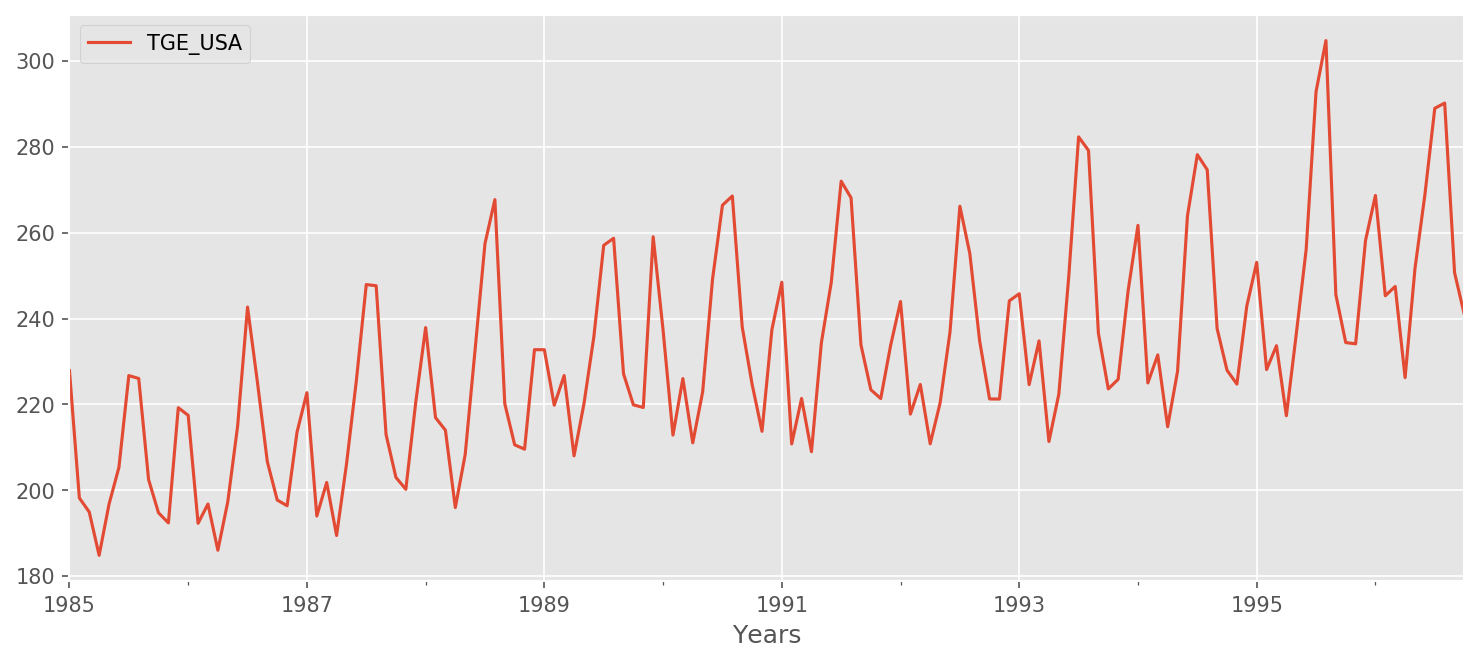

In [16]:
fig, ax = plt.subplots(figsize=(12,5), dpi=150)
data.plot(ax=ax, legend=True)
plt.xlabel('Years')
plt.show()

Как видно по графику, у данных имеется мультипликативная сезонность в один год и аддитивный тренд. 

In [17]:
model1 = ExponentialSmoothing(data, trend='add', seasonal='mul', seasonal_periods=12).fit()

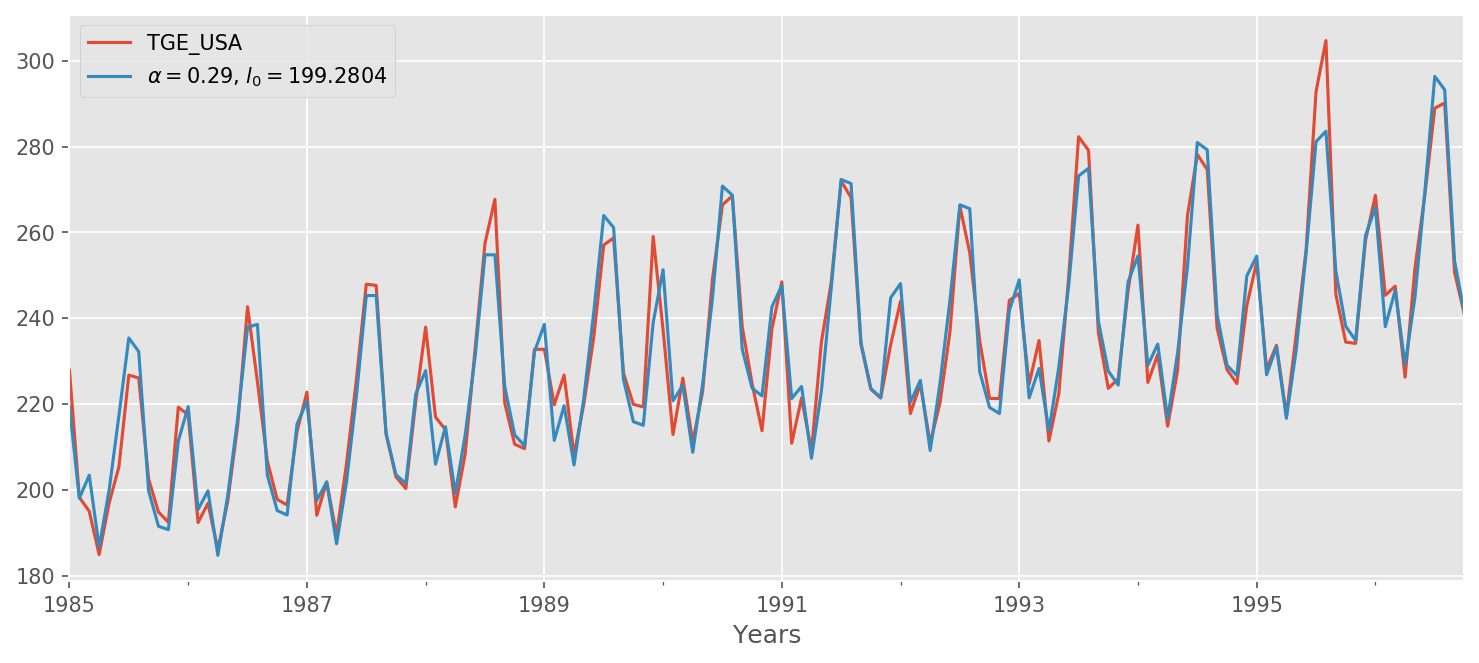

In [18]:
fig, ax = plt.subplots(figsize=(12,5), dpi=150)

data.plot(ax=ax)
model1.fittedvalues.rename(r'$\alpha=%.2f$' % model1.model.params['smoothing_level'] + ', ' +
                        r'$l_0=%.4f$' % model1.model.params['initial_level']).plot(ax=ax, legend=True)
plt.xlabel('Years')
plt.show()

### MSE

In [19]:
def mse(values):
    return sum((values - np.mean(values))**2)

print(f'Initial data MSE: {mse(data.values)[0]}\nModel data MSE: {mse(model1.fittedvalues)}')

Initial data MSE: 83756.5092429578
Model data MSE: 79813.60877279422


### Forecasting

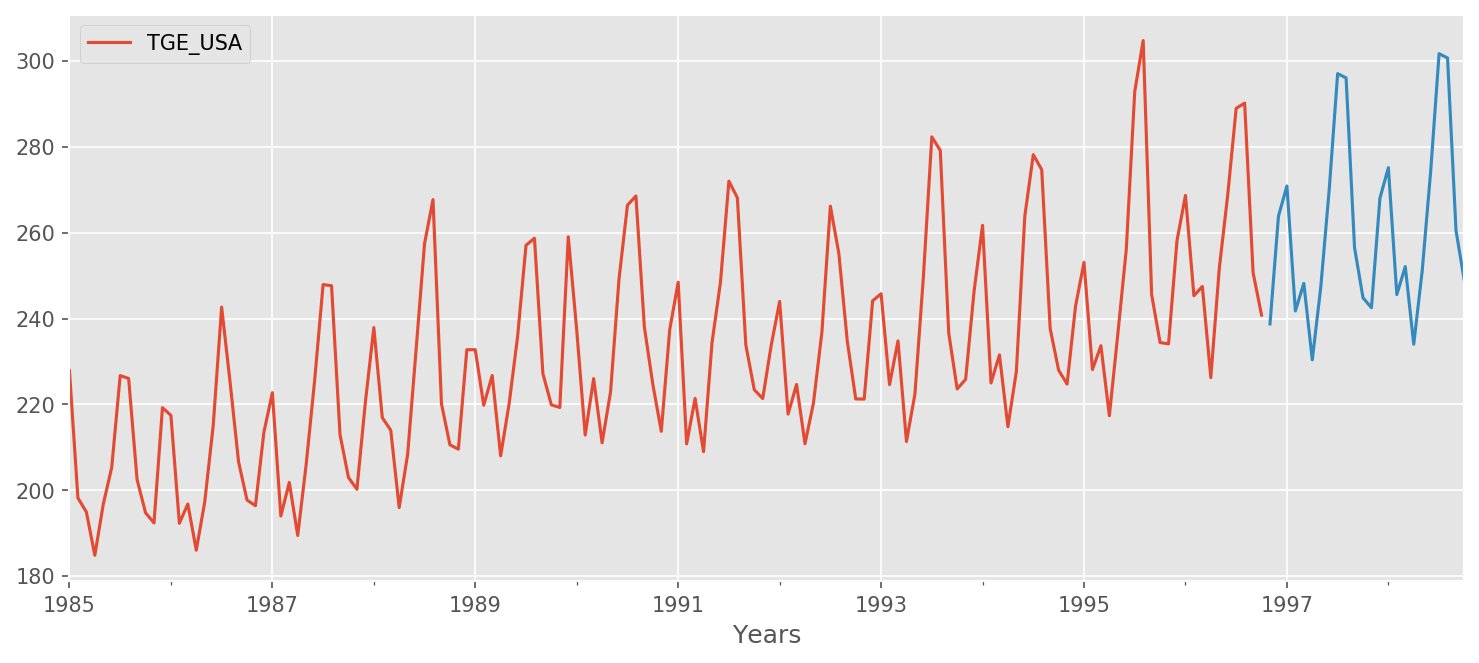

In [20]:
fig, ax = plt.subplots(figsize=(12,5), dpi=150)

data.plot(ax=ax)
model1.forecast(24).plot(ax=ax)
plt.xlabel('Years')
plt.show()